In [2]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


In [35]:
import pandas as pd
import numpy as np
import os

filename = "한국어_단발성_대화_데이터셋.xlsx"
path = "/content/drive/MyDrive/일기_NLP/Sentiment_Analysis/Data/"
df = pd.read_excel(os.path.join(path, filename))
df = df[["Sentence", "Emotion"]]

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38594 entries, 0 to 38593
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sentence  38594 non-null  object
 1   Emotion   38594 non-null  object
dtypes: object(2)
memory usage: 603.2+ KB


In [37]:
df.groupby("Emotion").count()

,Sentence
Emotion,
공포,5468
놀람,5898
분노,5665
슬픔,5267
중립,4830
행복,6037
혐오,5429


In [38]:
df.head(5)

,Sentence,Emotion
0,언니 동생으로 부르는게 맞는 일인가요..??,공포
1,그냥 내 느낌일뿐겠지?,공포
2,아직너무초기라서 그런거죠?,공포
3,유치원버스 사고 낫다던데,공포
4,근데 원래이런거맞나요,공포


In [39]:
df.to_csv(os.path.join(path, "한국어_감정분석.csv"), index=False)
df = pd.read_csv(os.path.join(path, "한국어_감정분석.csv"))
df.columns

Index(['Sentence', 'Emotion'], dtype='object')

In [40]:
df.columns = ["text", "kor_label_str"]

In [42]:
emo2int = {
    "슬픔": 0, "분노": 1, "행복": 2,
    "놀람": 3, "공포": 4, "혐오": 5, "중립": 6
}
emo2en_emo = {
    "슬픔": "sadness", "분노": "anger", "행복": "joy",
    "놀람": "surprise", "공포": "fear", "혐오": "hate", "중립": "neutral"
}
f = lambda x : emo2int[x]
df["label"] = df["kor_label_str"].apply(f)
df["label_name"] = df["kor_label_str"].apply(lambda x : emo2en_emo[x])
df.head()

,text,kor_label_str,label,label_name
0,언니 동생으로 부르는게 맞는 일인가요..??,공포,4,fear
1,그냥 내 느낌일뿐겠지?,공포,4,fear
2,아직너무초기라서 그런거죠?,공포,4,fear
3,유치원버스 사고 낫다던데,공포,4,fear
4,근데 원래이런거맞나요,공포,4,fear


# EDA

## 감정당 단어 갯수 분포 확인

<Axes: title={'center': 'Words Per Sentence'}, xlabel='label_name'>

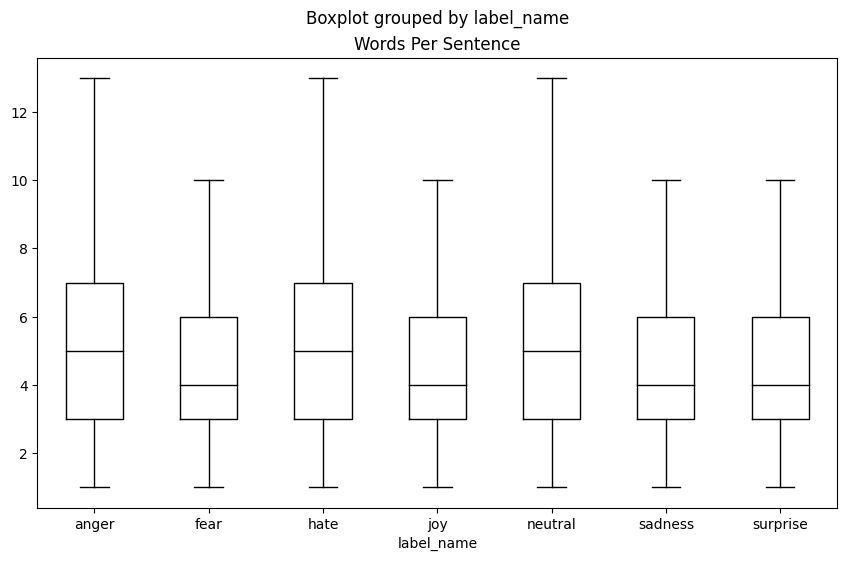

In [43]:
df["Words Per Sentence"] = df["text"].str.split().apply(len)
df.boxplot("Words Per Sentence", by="label_name", grid=False,
           showfliers=False, figsize=(10, 6), color="black")

## 클래스 분포 확인.

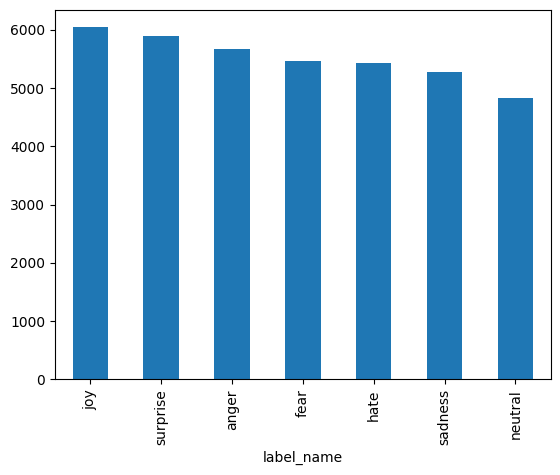

In [44]:
import matplotlib.pyplot as plt

df["label_name"].value_counts().plot(kind="bar")
plt.show()

### Preprocessing 완료

In [46]:
df.to_csv(os.path.join(path, "sentiment_kor_preprocessed_v1.0.csv"), index=False)